# Overview of `eolearn.core`

`eolearn.core` is the main subpackage which implements basic building blocks (`EOPatch`, `EOTask` and `EOWorkflow`) and commonly used functionalities.

## EOPatch

EOPatch is common data-object that contains contains multi-temporal remotely sensed data of a single patch (area) of Earth’s surface typically defined by a bounding box in a specific coordinate reference system.

There is no limitation on the amount of data, or the type of data that can be stored in an EOPatch. But typically, an EOPatch contains geographical referenced raster and vector data stored in Xarray Dataset and Geopandas GeoDataFrame, respectively, as the following types of *features*:

* RASTER: A collection of array objects stored in `xarray.DataArray`s collected in a `xarray.Dataset`.
* VECTOR: A collection of time-dependent geometry objects stored as a `geopandas.GeoDataFrame` with geometry and `TIMESTAMP` columns.
* VECTOR_TIMELESS: A collection of time-independent geometry objects stored as a `geopandas.GeoDataFrame` with geometry column.
* BBOX: A bounding box of the patch which is an instance of `sentinelhub.BBox`. It holds information about coordinates and CRS.

### What is an `xarray.DataArray`?
> `xarray.DataArray` is xarray’s implementation of a labeled, multi-dimensional array. It has several key properties:
> * `values`: a `numpy.ndarray` holding the array’s values
> * `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`)
> * `coords`: a `dict`-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
> * `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

Source: [Xarray documentation](http://xarray.pydata.org/en/stable/data-structures.html#dataarray)

Thus, an `xarray.DataArray` can contain all of the following types of arrays:

* DATA with shape `t * x * y * d`: Time- and position-dependent remote sensing data (e.g. bands) of float type.
* DATA_TIMELESS with shape `x * y * d`: Time-independent and position-dependent remote sensing data (e.g. elevation model) of float type.
* MASK with shape `t * x * y * d`: Time- and position-dependent mask (e.g. ground truth, cloud/shadow mask, super pixel identifier) of integer or boolean type.
* MASK_TIMELESS with shape `x * y * d`: Time-independent and position-dependent mask (e.g. ground truth, region of interest mask) of integer or boolean type.
* SCALAR with shape `t * d`: Time-dependent and position-independent remote sensing data (e.g. weather data,) of float type.
* SCALAR_TIMELESS with shape `d`:  Time-independent and position-independent remote sensing data of float type.
* LABEL with shape `t * d`: Time-dependent and position-independent label (e.g. ground truth) of integer or boolean type.
* LABEL_TIMELESS with shape `d`: Time-independent and position-independent label of integer or boolean type.

Note: `t` specifies time dimension, `x` and `y` are spatial dimensions (i.e. number of columns and rows), and `d` is an additional dimensions for data with multiple channels.

### What is an `xarray.Dataset`?

> `xarray.Dataset` is xarray’s multi-dimensional equivalent of a `DataFrame`. It is a dict-like container of labeled arrays (`DataArray` objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the [netCDF](https://www.unidata.ucar.edu/software/netcdf/) file format.
> In addition to the dict-like interface of the dataset itself, which can be used to access any variable in a dataset, datasets have four key properties:
> * `dims`: a dictionary mapping from dimension names to the fixed length of each dimension (e.g., `{'x': 6, 'y': 6, 'time': 8}`)
> * `data_vars`: a dict-like container of DataArrays corresponding to variables
> * `coords`: another dict-like container of DataArrays intended to label points used in `data_vars` (e.g., arrays of numbers, datetime objects or strings)
> * `attrs`: an `OrderedDict` to hold arbitrary metadata

Source: [Xarray documentation](http://xarray.pydata.org/en/stable/data-structures.html#dataset)

Thus, an `xarray.Dataset` can contain all of the above listed types of arrays, as well as enabling easy operations across the DataArrays based on their shared dimensions.

### Create an empty patch

In [1]:
from eolearn.core import EOPatch

patch = EOPatch()
patch

EOPatch(
  raster: <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
  data: {}
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

### Add a `DataArray` to the EOPatch
Each `DataArray` has to belong to RASTER feature type listed above.

In [2]:
import numpy as np
import xarray as xr
from eolearn.core import FeatureType

new_ndarray_bands = np.zeros((5, 10, 10, 13), dtype=np.float32)

patch[FeatureType.DATA]['bands'] = new_ndarray_bands
# or alternatively by
patch.data['bands'] = new_ndarray_bands

new_bands = xr.DataArray(
    np.random.random(size=(5, 10, 10, 13)))

patch[FeatureType.RASTER]['bands'] = new_bands
# or alternatively by
patch.raster['bands'] = new_bands

patch  # Check current content of EOPatch with it's string representation

EOPatch(
  raster: <xarray.Dataset>
Dimensions:  (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    bands    (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973
  data: {
    bands: numpy.ndarray(shape=(5, 10, 10, 13), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

### Get all non-empty features of EOPatch

In [3]:
patch.get_features()

{<FeatureType.RASTER: 'raster'>: True, <FeatureType.DATA: 'data'>: {'bands'}}

### Get a feature from EOPatch

In [4]:
data = patch[FeatureType.RASTER]
# or alternatively by
patch.raster

data

<xarray.Dataset>
Dimensions:  (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    bands    (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973

### Save EOPatch to local folder

In case EOPatch would already exist in the specified location we are also giving a permission to overwrite its features.

In [5]:
data = patch.raster
data

<xarray.Dataset>
Dimensions:  (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    bands    (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973

In [6]:
from eolearn.core import OverwritePermission

patch.save('./example_patch', overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

./example_patch_tmp_1562345062.265108/raster/RASTER.nc <class 'str'>


PermissionError: [Errno 13] Permission denied: './example_patch_tmp_1562345062.265108' -> './example_patch'

### Load EOPatch from the same folder

In [ ]:
patch2 = EOPatch.load('./example_patch')
patch2

In [ ]:
patch == patch2

### Remove a feature from EOPatch

In [ ]:
del patch2[FeatureType.RASTER]['bands']
# or alternatively by
#del patch2.raster['bands']

patch2

### Make a shallow and deep copy of EOPatch

Shallow copy will copy only a reference to data but not the data itself.

In [ ]:
patch1 = patch.__copy__()
patch2 = patch.__deepcopy__()

patch.data['bands'] += 1

patch == patch1, patch == patch2

### Concatenate two EOPatches

Concatenate two EOPatches to add their arrays to the same feature in a single EOPatch. 

In [ ]:
patch2[FeatureType.RASTER]['bands2'] = new_bands
patch2[FeatureType.DATA]['bands2'] = new_ndarray_bands

patch + patch2
# or alternatively by
EOPatch.concatenate(patch, patch2)

## EOTask

An EOTask is any class the inherits from the abstract `EOTask` class. Each EO task has to implement the execute method; invoking __call__ on a EO task instance invokes the execute method. EO tasks are meant primarily to operate on EOPatches (i.e. instances of EOPatch).

### Add a feature using the EOTask

`AddFeature` is a simple EOTask which adds a feature to a given EOPatch.

In [7]:
from eolearn.core import AddFeature

patch = EOPatch()

add_ndarray_feature = AddFeature((FeatureType.DATA, 'bands'))
add_feature = AddFeature((FeatureType.RASTER, 'bands'))

patch = add_ndarray_feature.execute(patch, new_ndarray_bands)
# or alternatively by 
patch = add_ndarray_feature(patch, new_ndarray_bands)

patch = add_feature.execute(patch, new_bands)
# or alternatively by 
patch = add_feature(patch, new_bands)

patch

EOPatch(
  raster: <xarray.Dataset>
Dimensions:  (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    bands    (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973
  data: {
    bands: numpy.ndarray(shape=(5, 10, 10, 13), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

### Create a composite EOTask

Composite EOTask is created using a multiplication operator (`a * b`) function.

In [8]:
from eolearn.core import CopyTask, RenameFeature

copy_task = CopyTask()
rename_ndarray_feature = RenameFeature((FeatureType.DATA, 'bands', 'the_bands'))
rename_feature = RenameFeature((FeatureType.RASTER, 'bands', 'the_bands'))
copy_rename_task = rename_ndarray_feature * rename_feature * copy_task

new_patch = copy_rename_task(patch)
new_patch

EOPatch(
  raster: <xarray.Dataset>
Dimensions:    (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    the_bands  (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973
  data: {
    the_bands: numpy.ndarray(shape=(5, 10, 10, 13), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)

### Create new EOTask

If a task does not exist yet, the user can implement it and easily include it into a workflow. There is very little or almost no overhead in the implementation of a new EOTask as seen from this minimal example.

In [9]:
from eolearn.core import EOTask

class FooTask(EOTask):
    def __init__(self, foo_param):
        self.foo_param = foo_param

    def execute(self, eopatch, *, patch_specific_param=None):
        # do what foo does on input eopatch and return it
        return eopatch

Arguments to an EOTask are either static (set when EOTask is initialized; i.e. foo_param above) or dynamic (set during the execution of the workflow; i.e. patch_specific_param above).

The list of all EOTasks in the `eolearn.core` subpackage is available here https://eo-learn.readthedocs.io/en/latest/eotasks.html#core

## EOWorkflow

A workflow is a directed (acyclic) graph composed of instances of EOTask objects. Each task may take as input the results of other tasks and external arguments. The external arguments are passed anew each time the workflow is executed. The workflow builds the computational graph, performs dependency resolution, and executes the tasks. If the input graph is cyclic, the workflow raises a CyclicDependencyError.

The result of a workflow execution is an immutable mapping from tasks to results. The result contains tasks with zero out-degree (i.e. terminal tasks).

Create a workflow

In [10]:
from eolearn.core import EOWorkflow, Dependency

patch = EOPatch()

workflow = EOWorkflow([
    Dependency(add_feature, inputs=[]),
    Dependency(copy_task, inputs=[add_feature]),
    Dependency(rename_feature, inputs=[copy_task])
])
# Instead of Dependecy class also just a tuple can be used
                                    
result = workflow.execute({
    add_feature: {'eopatch': patch,
                  'data': new_bands}
})
        
result

WorkflowResults(
  Dependency(RenameFeature): EOPatch(
  raster: <xarray.Dataset>
Dimensions:    (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    the_bands  (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973
  data: {}
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)
)

### Display the dependency graph

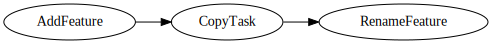

In [11]:
%matplotlib inline

workflow.dependency_graph('graph.png')

### Create a linear workflow

For a linear workflow such as previous one you can also use `LinearWorkflow` class.

In [12]:
from eolearn.core import LinearWorkflow

patch = EOPatch()

workflow = LinearWorkflow(add_feature, copy_task, rename_feature)

result = workflow.execute({
    add_feature: {'eopatch': patch,
                  'data': new_bands}
})
result                               

WorkflowResults(
  Dependency(RenameFeature): EOPatch(
  raster: <xarray.Dataset>
Dimensions:    (dim_0: 5, dim_1: 10, dim_2: 10, dim_3: 13)
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    the_bands  (dim_0, dim_1, dim_2, dim_3) float64 0.4094 0.6454 ... 0.2973
  data: {}
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: None
  timestamp: []
)
)

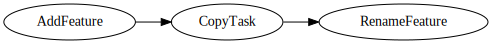

In [13]:
workflow.dependency_graph('graph.png')

## EOExecutor

`EOExecutor` handles execution and monitoring of workflows. It enables executing a workflow multiple times and in parallel. It monitors execution times and handles any error that might occur in the process. At the end it generates a report which contains summary of the workflow and process of execution.

Execute previously defined workflow with different arguments

In [14]:
from eolearn.core import EOExecutor

execution_args = [  # EOWorkflow will be executed for each of these 3 dictionaries:
    {add_feature: {'eopatch': patch,
                  'data': new_bands}},
    {add_feature: {'eopatch': patch,
                  'data': new_bands - 1}},
    {add_feature: {'eopatch': patch,
                  'data': new_bands * 10}},
]

executor = EOExecutor(workflow, execution_args, save_logs=True, logs_folder='.')

executor.run(workers=3)  # The execution will use at most 3 parallel processes

### Make the report

In [18]:
executor.make_report()

print('Report was saved to location: {}'.format(executor.get_report_filename()))

Report was saved to location: ./eoexecution-report-2019_07_05-18_44_36/report.html
